### AI Forecasting Using Long-Short-Term Memory Univariate Model
#### Price Action is All You Need

##### Imports

In [1]:
#import the libraries
import math
import warnings
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matlib
from tensorflow.keras import Sequential
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM
warnings.filterwarnings('ignore')

2023-02-15 19:09:25.935621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 19:09:26.146214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 19:09:26.146258: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-15 19:09:27.712872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Retrieve the Data and Create the Dataset

In [2]:
warnings.filterwarnings("ignore")
matlib.style.use('fivethirtyeight')

#get the stock quote for the past 10 years
stock = 'SPY'
# stock = input("Enter a stock ticker: ")
num_of_years = 10
start_date = datetime.datetime.now() - datetime.timedelta(days=int(365.25*num_of_years))
end_date = datetime.date.today()

df = yf.Ticker(stock).history(interval="1d", start=start_date, end=end_date)
data = df.filter(['Close'])
dataset = data.values

features_count = 1 # num of variables

train_data_len = math.ceil(len(dataset)*.8)
display(dataset.shape)
display(dataset)

(2516, 1)

array([[127.27970123],
       [125.69334412],
       [124.92928314],
       ...,
       [408.04000854],
       [412.82998657],
       [412.64001465]])

### Start Dataset Cleaning and Pre-Processing

In [3]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#create the training dataset
train_data = scaled_data[0:train_data_len, :]
display(train_data)

array([[0.01019184],
       [0.00561141],
       [0.00340527],
       ...,
       [0.73820435],
       [0.74361609],
       [0.74266258]])

In [4]:
#split the data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    # print(x_train)
    # print(y_train)
    print()

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

display(x_train.shape)
display(x_train[0:2])
display(y_train.shape)
display(y_train[0:2])

(1953, 60)

array([[0.01019184, 0.00561141, 0.00340527, 0.00693033, 0.        ,
        0.00244606, 0.00697833, 0.00625897, 0.00745799, 0.00940049,
        0.01268572, 0.01318939, 0.01386088, 0.01544376, 0.01685859,
        0.0160192 , 0.0165467 , 0.01853707, 0.01804093, 0.01596937,
        0.01510222, 0.01770376, 0.01450008, 0.01748704, 0.0159213 ,
        0.01890817, 0.01890817, 0.02006434, 0.01857091, 0.02042571,
        0.01659565, 0.01811314, 0.01642704, 0.01895624, 0.02025705,
        0.02488174, 0.02613418, 0.0251949 , 0.01633069, 0.02184684,
        0.01630668, 0.01397019, 0.01719788, 0.01885988, 0.02273809,
        0.02297883, 0.02452042, 0.02384602, 0.02639923, 0.0273148 ,
        0.02394246, 0.02748323, 0.03138528, 0.03237306, 0.03434823,
        0.03613073, 0.03502249, 0.03629925, 0.03661241, 0.04068311],
       [0.00561141, 0.00340527, 0.00693033, 0.        , 0.00244606,
        0.00697833, 0.00625897, 0.00745799, 0.00940049, 0.01268572,
        0.01318939, 0.01386088, 0.01544376, 0.0

(1953,)

array([0.04282689, 0.04094799])

In [5]:
#reshape the data to 3 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], features_count))
display(x_train.shape)

(1953, 60, 1)

### Build the LSTM Model using Tensorflow Keras Library

In [6]:
Epochs = 100
Batch_size = 32

#build LSTM model
model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],features_count)))
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], features_count)))
# model.add(Dropout(0.2))
model.add(Dense(32))

model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.2))

model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

#train the model
history = model.fit(x_train, y_train, batch_size=Batch_size, epochs=Epochs,validation_split=0.2, verbose=1)
# model.fit(x_train, y_train, batch_size=1, epochs=10, validation_split=0.2, verbose=1,shuffle=False)


2023-02-15 19:09:30.578924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-15 19:09:30.578956: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-15 19:09:30.578980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sabawi-Lenovo-Y50-70): /proc/driver/nvidia/version does not exist
2023-02-15 19:09:30.579241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dense (Dense)               (None, 60, 32)            2080      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27,329
Trainable params: 27,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
49/49 [==============================] - 9s 73ms/step - loss: 0.0066 - mae: 0.0547 - val_loss: 0.0048 - val_mae: 0.0598
Epoch 2/100
49/49 [==============================] -

### Let's Look at Losses and Errors 

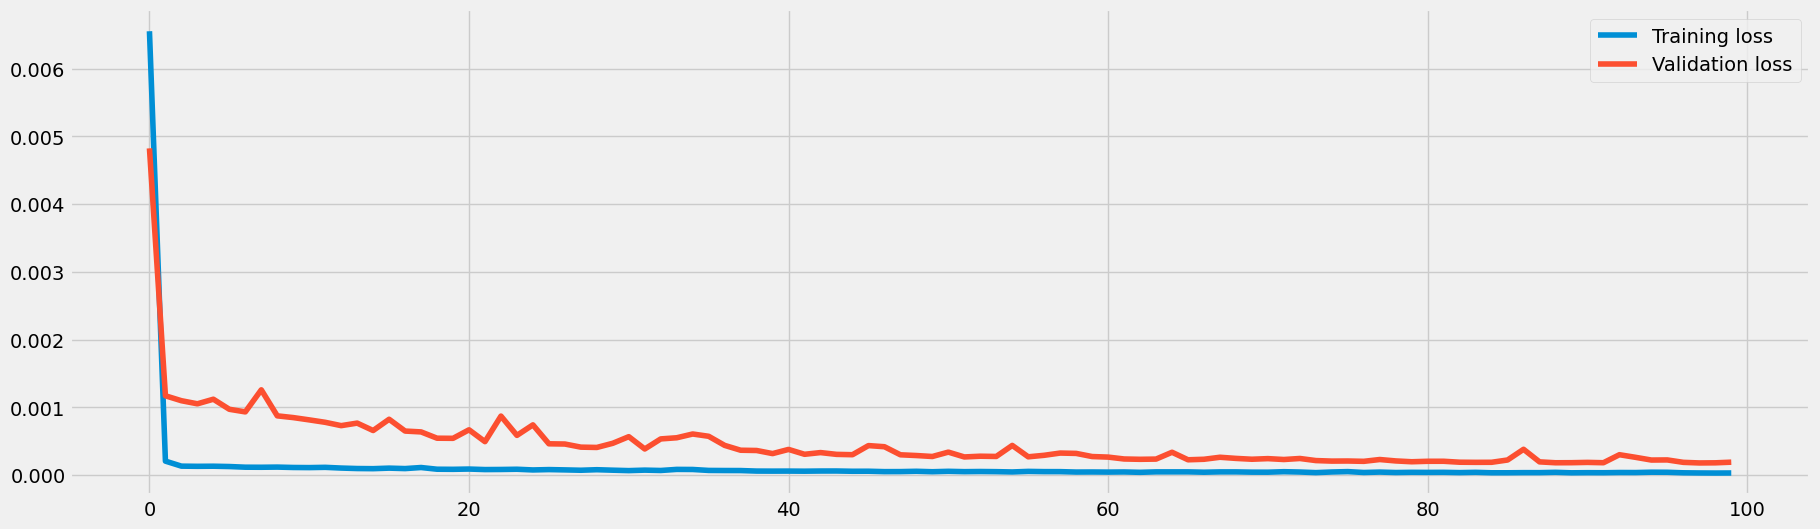

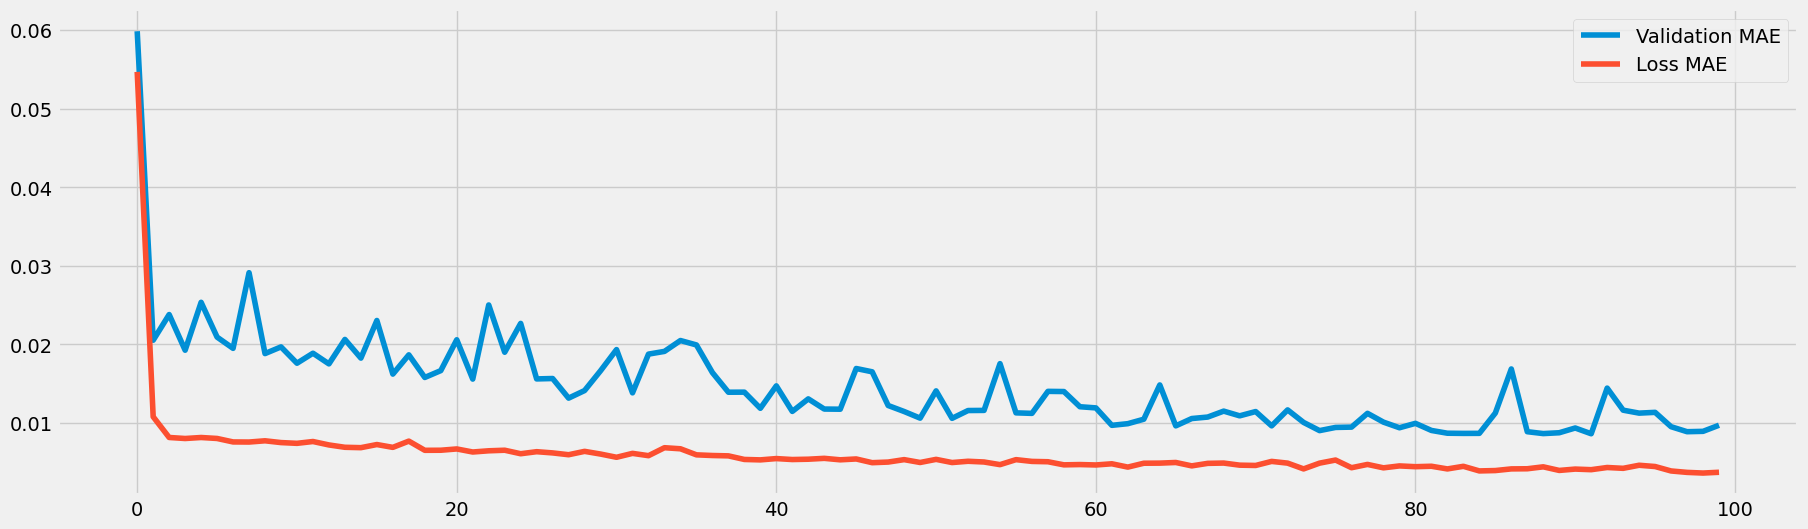

In [7]:
# Plot Losses
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()    
plt.show()

# Plot MAEs
plt.figure(figsize=(20,6))
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.plot(history.history['mae'], label='Loss MAE')
plt.legend()    
plt.show()

### Rescaling Back the Data

In [8]:
#create test dataset
test_data = scaled_data[train_data_len-60:, :]
print(test_data.shape)

(563, 1)


### Prep the Predictions Test Data

In [9]:
#create dataset x_test, y_test
x_test = []
y_test = dataset[train_data_len:, :]

In [10]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#convert data to numpy array
x_test = np.array(x_test)

print(x_test.shape)

(503, 60)


In [11]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], features_count))
print(x_test.shape)

(503, 60, 1)


# Predict using the Test data

In [12]:
#get the models predicted price values
predictions = model.predict(x_test)
print(predictions.shape)

16/16 [==============================] - 1s 16ms/step
(503, 1)


### Check the Root-Mean-Square-Error value

In [13]:
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
print("RMSE = ", rmse)

RMSE =  6.011333489441752


In [14]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions[:,0]
print(valid)

                                Close  Predictions
Date                                              
2021-02-17 00:00:00-05:00  381.046509   378.373840
2021-02-18 00:00:00-05:00  379.424744   378.122894
2021-02-19 00:00:00-05:00  378.754700   376.672211
2021-02-22 00:00:00-05:00  375.841431   375.936676
2021-02-23 00:00:00-05:00  376.297882   373.441559
...                               ...          ...
2023-02-08 00:00:00-05:00  410.649994   410.510315
2023-02-09 00:00:00-05:00  407.089996   407.725677
2023-02-10 00:00:00-05:00  408.040009   403.207397
2023-02-13 00:00:00-05:00  412.829987   404.125061
2023-02-14 00:00:00-05:00  412.640015   409.478577

[503 rows x 2 columns]


### Plot the Predicted Prices with Actuals for Comparison 

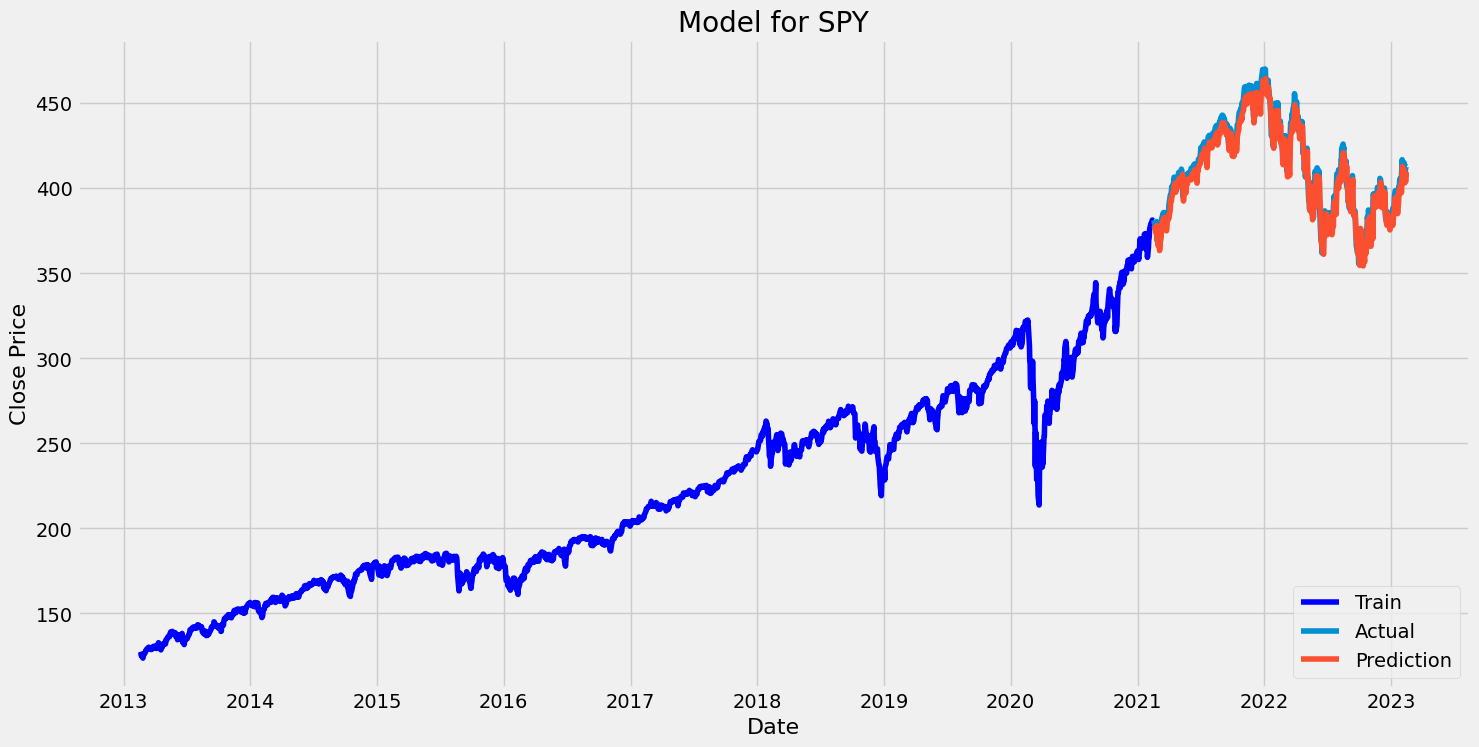

In [15]:
fig = plt.figure(figsize=(16,8))
plt.title('Model for {}'.format(stock.upper()))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'],color='b')
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual','Prediction'],loc='lower right')
plt.show()

In [22]:
print(valid.iloc[-1:])

                                Close  Predictions
Date                                              
2023-02-14 00:00:00-05:00  412.640015   409.478577


## Evaluate Model Accuracy

Out of 503 closing prices, 404 predictions fill within 1.0% of actuals (80.0% Accuracy)
Predicted Higher OR Equal than Actuals : 12  (2.39) of Total
Predicted Lower than Actuals : 490  (97.42) of Total
The accuracy of the LSTM Model predicting the movement of a stock each day is 80.0%


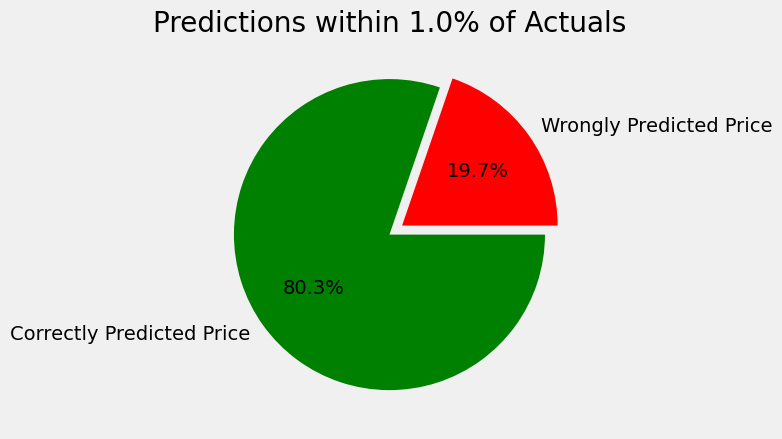

In [17]:
# find the accuracy based on predicting day-to-day movements 
valid_movement = []
pred_movement = []
close_prices = valid.Close.tolist()
pred_prices = valid.Predictions.tolist()
        
n = higher = lower = 0

m = 0.01 # +/- 0.5% of the actual pric

for index, value in enumerate(close_prices[:-1]):
    p = pred_prices[index+1]
    if (value >(p-(p*m)) and (value < (p+(p*m)))):  
        n +=1

    if p >= value:
        higher +=1
    else:
        lower +=1

total = len(valid)
accuracy = np.round(n/total,2)
print("Out of "+str(total)+" closing prices, "+str(n)+" predictions fill within "+
      str(100*(m))+"% of actuals ("+str(accuracy*100)+"% Accuracy)")
print("Predicted Higher OR Equal than Actuals :",higher," ("+str(round((higher/total)*100,2))+") of Total")
print("Predicted Lower than Actuals :",lower," ("+str(round((lower/total)*100,2))+") of Total" )
print (f'The accuracy of the LSTM Model predicting the movement of a stock each day is {round(100 * accuracy, 3)}%')

# dataframe = pd.DataFrame(list(zip(valid_movement, pred_movement)), columns =['Valid Movement', 'Predicted Movement'])
# display(dataframe)
plt.pie( [100*(total-n)/total,100*accuracy],
        labels=['Wrongly Predicted Price', 'Correctly Predicted Price'],
        autopct='%1.1f%%' , explode=(0.1, 0),colors=['r','g'])
plt.title("Predictions within "+str(np.round((m)*100,2))+"% of Actuals")
plt.show()

## Predict the Close Price for a Single Day in the Future 

In [18]:
#get predicted price for next day
last_60day = data[-60:].values
last_60day_scaled = scaler.transform(last_60day)
xx_test = []
xx_test.append(last_60day_scaled)
xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
pred = pred[0]
pred = pred[0]
print("The predicted price for the next trading day is: {}".format(round(pred, 2)))

#get stats
#Root mean squared error 
print (f'The root mean squared error is {round(rmse, 2)}')

error = mean_squared_error(valid['Close'].tolist(), valid['Predictions'].tolist())
print('Testing Mean Squared Error: %.3f' % error)

1/1 [==============================] - 0s 30ms/step
The predicted price for the next trading day is: 409.79998779296875
The root mean squared error is 6.01
Testing Mean Squared Error: 36.136


### Plot the Last Year's Predictions and the Future

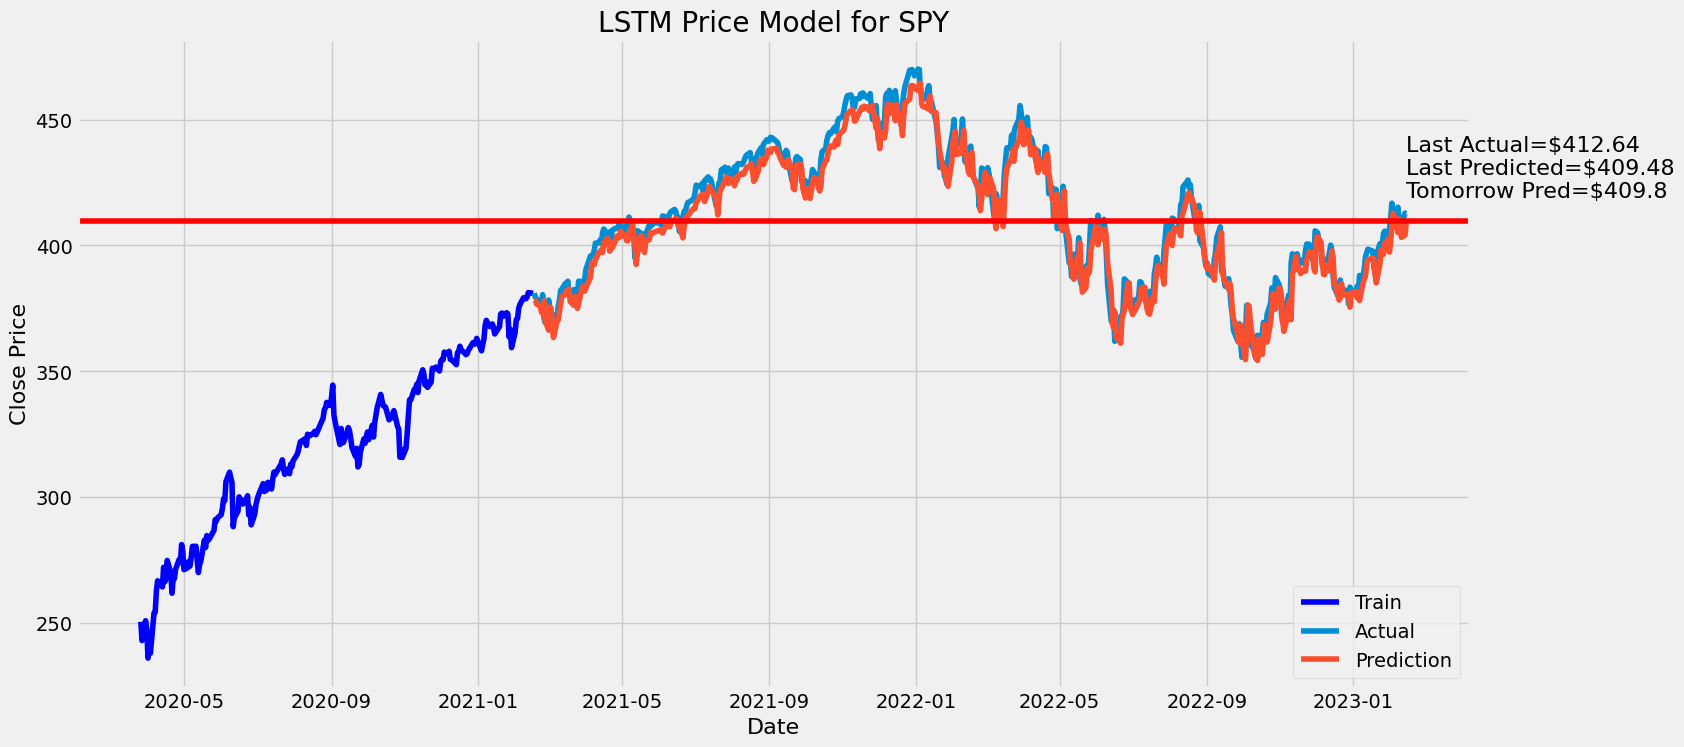

,Close,Predictions
Date,,
2023-02-01 00:00:00-05:00,410.799988,401.879150
2023-02-02 00:00:00-05:00,416.779999,407.423431
2023-02-03 00:00:00-05:00,412.350006,412.787201
2023-02-06 00:00:00-05:00,409.829987,408.630615
2023-02-07 00:00:00-05:00,415.190002,405.120850
2023-02-08 00:00:00-05:00,410.649994,410.510315
2023-02-09 00:00:00-05:00,407.089996,407.725677
2023-02-10 00:00:00-05:00,408.040009,403.207397
2023-02-13 00:00:00-05:00,412.829987,404.125061


In [19]:
#plot the data
train = data[train_data_len-225:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Price Model for {}'.format(stock.upper()))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'],'b')
plt.plot(valid[['Close','Predictions']])
plt.axhline(pred, color = 'r', linestyle = '-')
plt.text(valid.index[-1],pred,"Last Actual=$"+
    str(round(valid['Close'].iloc[-1],2))+
    "\nLast Predicted=$"+str(round(valid['Predictions'].iloc[-1],2))+
    "\nTomorrow Pred=$"+str(round(pred,2))+"\n",
    fontsize=16)
plt.legend(['Train','Actual','Prediction'],loc='lower right')
plt.show()
display(valid.tail(10))

# Save this model IF you are good with the results

In [20]:
now_str = datetime.datetime.now().strftime("%Y_%m_%d_%I_%M_%p")
model_filename = "./models/SPY_LSTM_model_"+now_str+".h5"
print("Saving model as "+ model_filename)
model.save(model_filename)

Saving model as ./models/SPY_LSTM_model_2023_02_15_07_14_PM.h5
